<a href="https://colab.research.google.com/github/daridr1000/Data-Analysis-with-Python/blob/main/Python_with_Matplotlib_for_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recap

Load tables from csv files:

In [ ]:
import pandas as pd
df = pd.read_csv("https://github.com/daridr1000/Data-Analysis-with-Python/blob/main/IMDB-Movie-Data.csv?raw=true")

In [ ]:
df.head() # gives the first 5 rows of the table

In [ ]:
df["Year"] < 2011 # filter the table based on column values (in this case: all rows after the year 2011)

In [ ]:
df.sort_values('Runtime (Minutes)').head() # order table by values of a column

In [ ]:
df.to_csv('Test.csv') # Save as a CSV file

In [ ]:
df.to_excel('Test.xlsx') # Save as a Excel file

# Introduction to yfinance

Yfinance is a library that provides access to stock data.


First need to install the library:

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

Load the latest stock-data:

In [ ]:
stock_data = yf.download('GOOG')
stock_data.head()

Can also specify period / interval

In [ ]:
stock_data = yf.download('GOOG', period='1d', interval='1m')
stock_data.head()

### Aside:

You can also gather miscellaneous information about a stock.

First, load the stock

In [ ]:
msft = yf.Ticker('MSFT') # 'msft' now contains information about the Microsoft stock (MSFT)

In [ ]:
msft.dividends

In [ ]:
msft.earnings

In [ ]:
msft.cashflow

There are many more interesting data points that can be loaded like this.
To find an overview click [here](https://pypi.org/project/yfinance/).

# Introduction to matplotlib

Matplotlib (=Mathematics plot library) enables the creation of all sorts of different graphs and plots

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
stock_data = yf.download('GOOG', period='1d', interval='1m')

data = stock_data['Close'].values # these are the values of the stock
times = stock_data['Close'].index # these are the timestamps from the stock data

plt.plot(times, data)

plt.show()

## Comparisons between companies

### Prerequisites

Let's import some stock data from Google, Microsoft and Tesla!

In [ ]:
start_date = '2015-01-01' 
end_date = '2021-01-01'
google = yf.download('GOOG',start = start_date,end = end_date)
microsoft = yf.download('MSFT',start = start_date,end = end_date)
tesla = yf.download('TSLA',start = start_date,end = end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582
...,...,...,...,...,...,...
2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800
2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400


In [ ]:
tesla.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1511, freq=None)

### Open prices

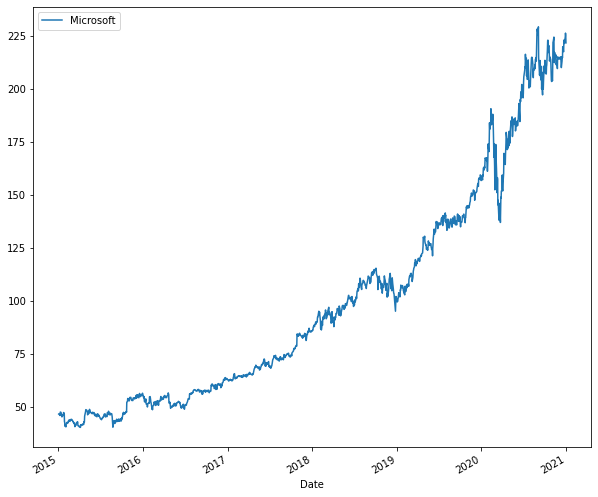

In [ ]:
microsoft['Open'].plot(label = 'Microsoft',figsize = (10,9))
plt.legend()

Text(0.5, 1.0, 'Stock prices for Microsoft, Google and Tesla')

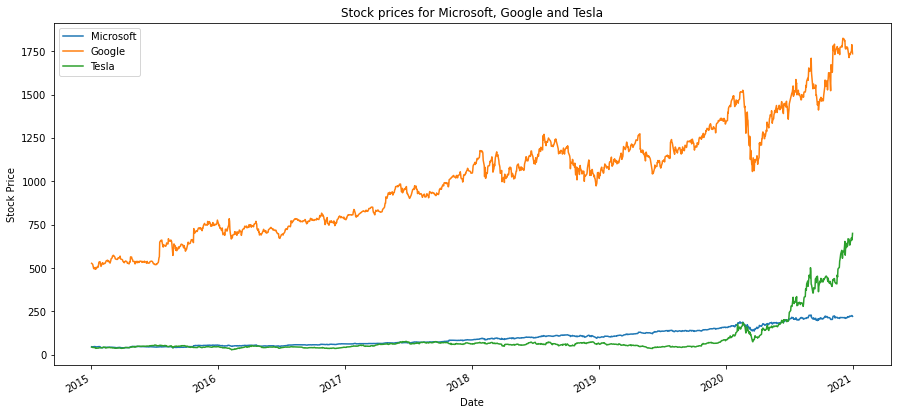

In [ ]:
microsoft['Open'].plot(label = 'Microsoft',figsize = (15,7))
google['Open'].plot(label = 'Google')
tesla['Open'].plot(label = 'Tesla')
plt.legend()
plt.ylabel("Stock Price")
plt.title("Stock prices for Microsoft, Google and Tesla")

### Volume traded

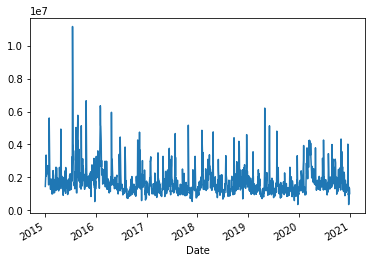

In [ ]:
google['Volume'].plot(label = 'Google')

Text(0.5, 1.0, 'Volumes traded for Microsoft, Google and Tesla')

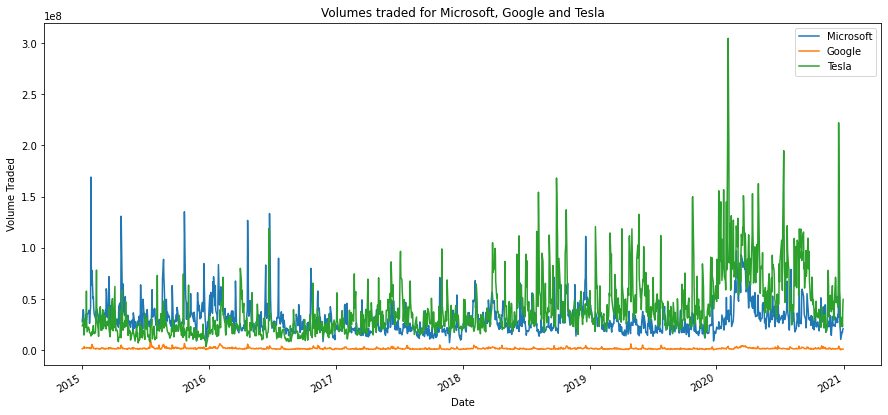

In [ ]:
microsoft['Volume'].plot(label = 'Microsoft',figsize = (15,7))
google['Volume'].plot(label = 'Google')
tesla['Volume'].plot(label = 'Tesla')
plt.legend()
plt.ylabel("Volume Traded")
plt.title("Volumes traded for Microsoft, Google and Tesla")

Find the date of the spike of Tesla:



In [ ]:
max(tesla['Volume'])

304694000

In [ ]:
tesla['Volume'] == max_spike

Date
2015-01-02    False
2015-01-05    False
2015-01-06    False
2015-01-07    False
2015-01-08    False
              ...  
2020-12-24    False
2020-12-28    False
2020-12-29    False
2020-12-30    False
2020-12-31    False
Name: Volume, Length: 1511, dtype: bool

In [ ]:
max_spike = max(tesla['Volume'])
tesla.loc[tesla['Volume'] == max_spike]
tesla.iloc[[tesla['Volume'].argmax()]] # argmax gives the index of the maximum value

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-04,176.591995,193.798004,166.776001,177.412003,177.412003,304694000


Plot the stock price for tesla again:

In [ ]:
tesla['Volume'].argmax()

1280

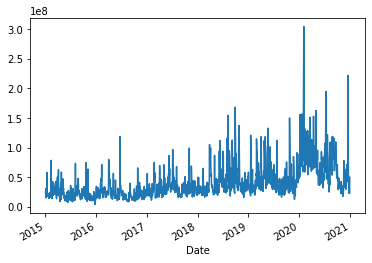

In [ ]:
tesla['Volume'].plot()

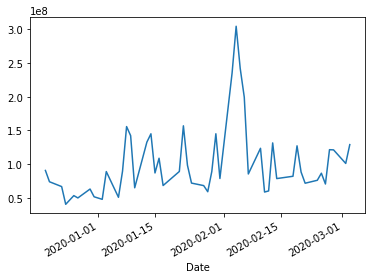

In [ ]:
tesla.iloc[1250:1300]['Volume'].plot() # volume went up

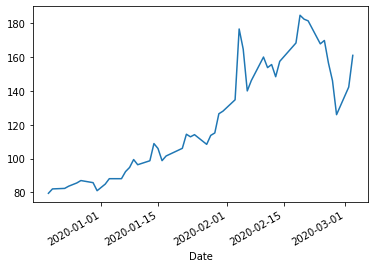

In [ ]:
tesla.iloc[1250:1300]['Open'].plot() # notice how stock price went down

### Scatter matrix of open prices

In [ ]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [ ]:
companies = pd.concat([microsoft["Open"],google["Open"],tesla["Open"]],axis = 1)
companies

,Open,Open,Open
Date,,,
2015-01-02,46.660000,527.561584,44.574001
2015-01-05,46.369999,521.827332,42.910000
2015-01-06,46.380001,513.589966,42.012001
2015-01-07,45.980000,505.611847,42.669998
2015-01-08,46.750000,496.626526,42.562000
...,...,...,...
2020-12-24,221.419998,1735.000000,642.989990
2020-12-28,224.449997,1751.635010,674.510010
2020-12-29,226.309998,1787.790039,661.000000


In [ ]:
companies = pd.concat([microsoft["Open"],google["Open"],tesla["Open"]],axis = 1)
companies.columns = ['Microsoft Open','Google Open','Tesla Open']
companies

,Microsoft Open,Google Open,Tesla Open
Date,,,
2015-01-02,46.660000,527.561584,44.574001
2015-01-05,46.369999,521.827332,42.910000
2015-01-06,46.380001,513.589966,42.012001
2015-01-07,45.980000,505.611847,42.669998
2015-01-08,46.750000,496.626526,42.562000
...,...,...,...
2020-12-24,221.419998,1735.000000,642.989990
2020-12-28,224.449997,1751.635010,674.510010
2020-12-29,226.309998,1787.790039,661.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6e37f53d0>,
      dtype=object)

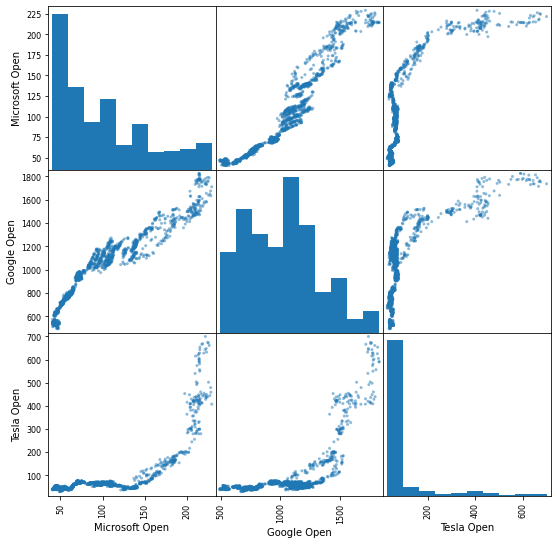

In [ ]:
scatter_matrix(companies,figsize = (9,9))

### Daily percentage change & histograms

In [ ]:
tesla['Close']

Date
2015-01-02     43.862000
2015-01-05     42.018002
2015-01-06     42.256001
2015-01-07     42.189999
2015-01-08     42.124001
                 ...    
2020-12-24    661.770020
2020-12-28    663.690002
2020-12-29    665.989990
2020-12-30    694.780029
2020-12-31    705.669983
Name: Close, Length: 1511, dtype: float64

In [ ]:
tesla['Close'].shift(1) # shifts all the elements from Close column by 1 to the right

Date
2015-01-02           NaN
2015-01-05     43.862000
2015-01-06     42.018002
2015-01-07     42.256001
2015-01-08     42.189999
                 ...    
2020-12-24    645.979980
2020-12-28    661.770020
2020-12-29    663.690002
2020-12-30    665.989990
2020-12-31    694.780029
Name: Close, Length: 1511, dtype: float64

Calculate the daily percentage change:

In [ ]:
tesla['returns'] = tesla['Close']/tesla['Close'].shift(1) - 1
tesla

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,NaN
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,-0.042041
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,0.005664
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,-0.001562
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,-0.001564
...,...,...,...,...,...,...,...
2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600,0.024444
2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600,0.002901
2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800,0.003465


In [ ]:
tesla['returns'] = tesla['Close']/tesla['Close'].shift(1) - 1
microsoft['returns'] = microsoft['Close']/microsoft['Close'].shift(1) - 1
google['returns'] = google['Close']/google['Close'].shift(1) - 1

In [ ]:
tesla.head()
google.head()
microsoft.head()

Plot the histograms:

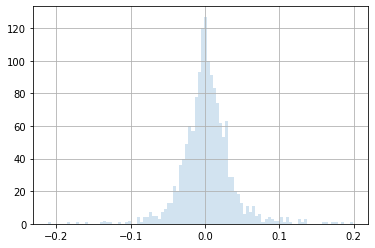

In [ ]:
tesla['returns'].hist(bins = 100,alpha = 0.2)

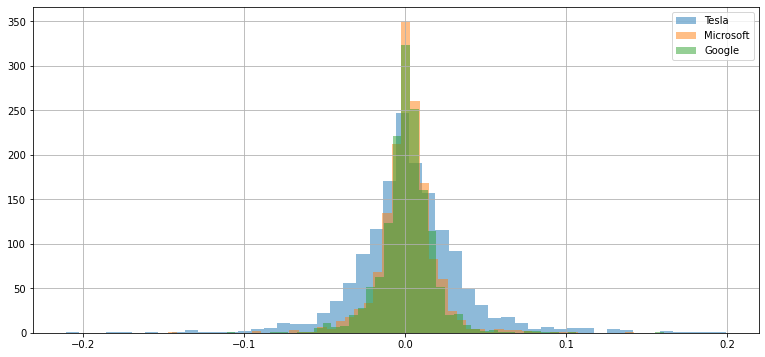

In [ ]:
tesla['returns'].hist(bins = 50,label = "Tesla",alpha = 0.5,figsize = (13,6))
microsoft['returns'].hist(bins = 50,label = "Microsoft",alpha = 0.5)
google['returns'].hist(bins = 50, label = "Google",alpha = 0.5)
plt.legend()

Plot the KDE(kernel density estimation)/ density graph:

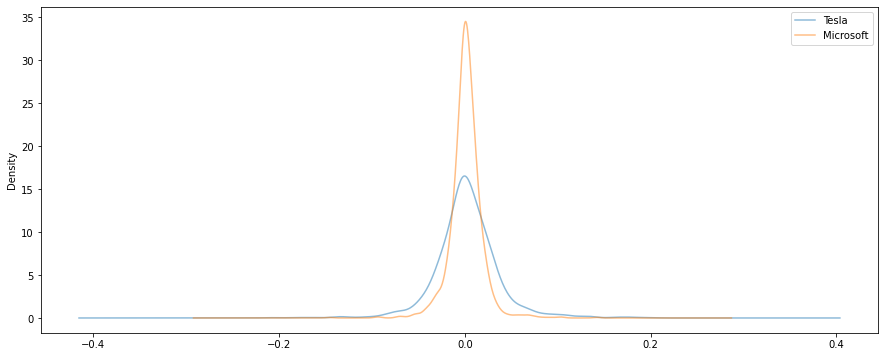

In [ ]:
tesla['returns'].plot(kind = "kde",label = "Tesla",alpha = 0.5,figsize = (15,6))
microsoft['returns'].plot(kind = "kde",label = "Microsoft",alpha = 0.5)
#google['returns'].plot(kind = "kde", label = "Google",alpha = 0.5)
plt.legend()

### Boxplots

In [ ]:
box_plot = pd.concat([microsoft["returns"],google["returns"],tesla["returns"]],axis = 1)
box_plot.columns = ['Microsoft returns','Google returns','Tesla returns']
box_plot

,Microsoft returns,Google returns,Tesla returns
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.009196,-0.020846,-0.042041
2015-01-06,-0.014677,-0.023177,0.005664
2015-01-07,0.012705,-0.001713,-0.001562
2015-01-08,0.029418,0.003153,-0.001564
...,...,...,...
2020-12-24,0.007827,0.003735,0.024444
2020-12-28,0.009921,0.021416,0.002901
2020-12-29,-0.003601,-0.009780,0.003465


Plot the boxplot:

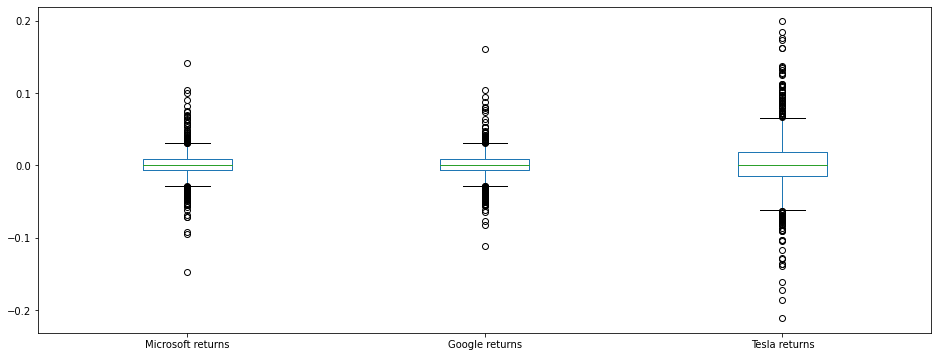

In [ ]:
box_plot.plot(kind="box",figsize = (16,6))

Look for correlations:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6e2d52890>,
      dtype=object)

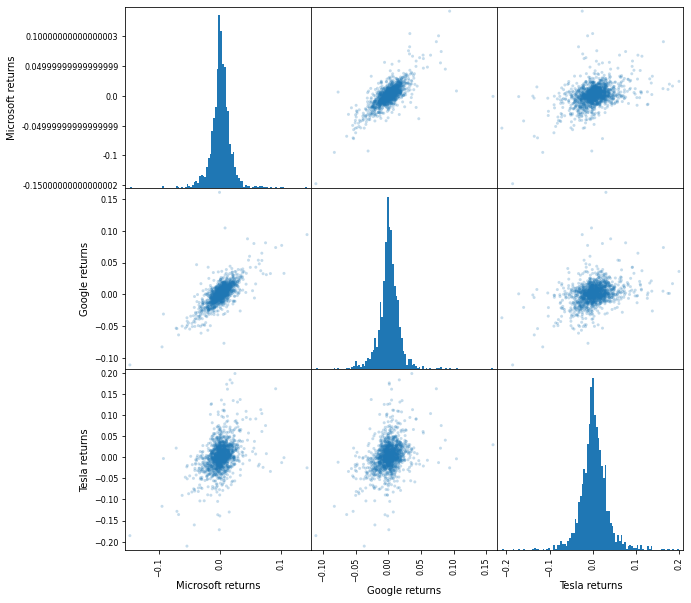

In [ ]:
scatter_matrix(box_plot,hist_kwds={"bins":100},alpha = 0.25,figsize=(10,10))

### Candlestick charts

In [ ]:
! pip install mplfinance

     |████████████████████████████████| 61kB 2.9MB/s 


In [ ]:
import mplfinance as fplt

In [ ]:
start_date = '2021-03-01' 
end_date = '2021-03-29'
google = yf.download('GOOG',start = start_date,end = end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,2056.520020,2086.520020,2046.099976,2081.510010,2081.510010,1404500
2021-03-02,2076.189941,2104.370117,2071.260010,2075.840088,2075.840088,1133600
2021-03-03,2067.209961,2088.518066,2010.000000,2026.709961,2026.709961,1483100
2021-03-04,2023.369995,2089.239990,2020.270020,2049.090088,2049.090088,2116100
2021-03-05,2073.120117,2118.110107,2046.415039,2108.540039,2108.540039,2193800
2021-03-08,2101.129883,2128.810059,2021.609985,2024.170044,2024.170044,1646000
2021-03-09,2070.000000,2078.040039,2047.829956,2052.699951,2052.699951,1696400
2021-03-10,2071.760010,2075.000000,2033.369995,2055.030029,2055.030029,1267800
2021-03-11,2074.060059,2125.699951,2072.379883,2114.770020,2114.770020,1238300


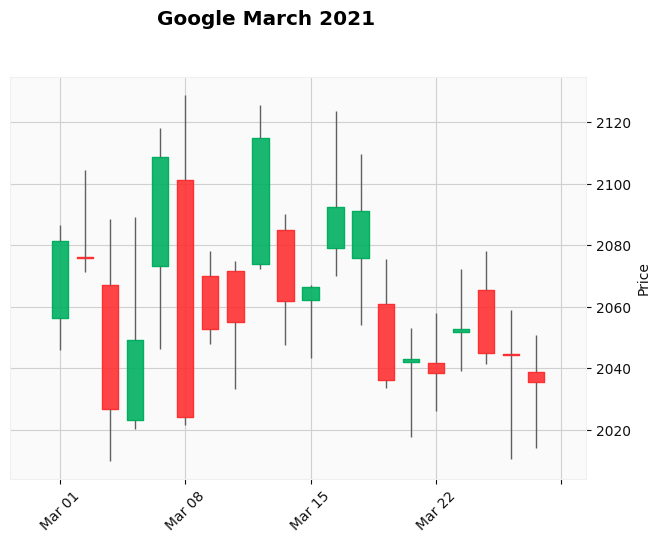

In [ ]:
fplt.plot(
    google,
    type = 'candle',
    title = 'Google March 2021',
    style = 'yahoo'
)

In [ ]:
fplt.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

# Useful Resources

- Basics of python
  - [Notes from a past workshop](https://colab.research.google.com/drive/1WiNoCNBPKGQxdjvXUXSpCLS47ROc3pOB?usp=sharing)
  - [Free online book for Python beginners](https://automatetheboringstuff.com/2e/chapter0/)

- Pandas:
  - [Notes from Workshop 3](https://colab.research.google.com/drive/1Ip6gWadbHIjLFyU6edqBB9sgfZNd1pXx#scrollTo=OYGTGSmAHfnf)
  - [Good introduction to Pandas](https://www.kaggle.com/learn/pandas)
- Matplotlib :
  - [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
  - [MPL finance](https://pypi.org/project/mplfinance/)

## Discord

Feel free to [join](https://discord.com/invite/N8JWDAr36u) our discord if you have any questions!